In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
g1 = (2,2) + 0.3 * np.random.randn(20, 2)
g2 = [2,4] + 0.3 * np.random.randn(20, 2)
g3 = [4,2] + 0.3 * np.random.randn(20, 2)
g4 = [4,4] + 0.3 * np.random.randn(20, 2)
g = np.concatenate([g1,g2,g3,g4])

color1 = ['black']*20
color2 = ['blue']*20
color3 = ['green']*20
color4 = ['red']*20
color = np.array([color1, color2, color3, color4]).flatten()

In [3]:
g = pd.DataFrame(g)
g = pd.concat([g[0], g[1], pd.Series(color)], axis=1)
g.columns = ['x','y','color']
#gt = pd.DataFrame(gt)
#gt = pd.concat([gt[0], gt[1], pd.Series(colort)], axis=1)
#gt.columns = ['x','y','color']

In [ ]:
plt.scatter(g.values[:,0], g.values[:,1], c=color)

In [5]:
g1 = [1,1] + 0.3 * np.random.randn(360, 2)
g2 = (-1,-1) + 0.3 * np.random.randn(360, 2)
g3 = (1,-1) + 0.3 * np.random.randn(360, 2)
g4 = (-1,1) + 0.3 * np.random.randn(360, 2)
g = np.concatenate([g1,g2,g3,g4])
color1 = ['blue']*360
color2 = ['red']*360
color3 = ['black']*360
color4 = ['green']*360
color = np.concatenate([color1, color2, color3, color4]).flatten()

In [ ]:
plt.scatter(g[:,0], g[:,1], c=color)

In [ ]:
g = pd.DataFrame(g)
g = pd.concat([g[0], g[1], pd.Series(color)], axis=1)
g.columns = ['x','y','color']
g.replace(to_replace=['blue', 'red', 'black', 'green'], value=[0,1,2,3], inplace=True)
g.loc[g['color'] == 0]

In [8]:
class Bayes():
    def __init__(self) -> None:
        pass
    def train(self,X_train):
        self.p = 300/1200
        self.sigmaxc0 = np.std(X_train.loc[X_train['color'] == 0]['x'].values)
        self.sigmayc0 = np.std(X_train.loc[X_train['color'] == 0]['y'].values)
        self.sigmaxc1 = np.std(X_train.loc[X_train['color'] == 1]['x'].values)
        self.sigmayc1 = np.std(X_train.loc[X_train['color'] == 1]['y'].values)
        self.sigmaxc2 = np.std(X_train.loc[X_train['color'] == 2]['x'].values)
        self.sigmayc2 = np.std(X_train.loc[X_train['color'] == 2]['y'].values)
        self.sigmaxc3 = np.std(X_train.loc[X_train['color'] == 3]['x'].values)
        self.sigmayc3 = np.std(X_train.loc[X_train['color'] == 3]['y'].values)
        self.mu0x = np.mean(X_train.loc[X_train['color'] == 0]['x'].values)
        self.mu0y = np.mean(X_train.loc[X_train['color'] == 0]['y'].values)
        self.mu1x = np.mean(X_train.loc[X_train['color'] == 1]['x'].values)
        self.mu1y = np.mean(X_train.loc[X_train['color'] == 1]['y'].values)
        self.mu2x = np.mean(X_train.loc[X_train['color'] == 2]['x'].values)
        self.mu2y = np.mean(X_train.loc[X_train['color'] == 2]['y'].values)
        self.mu3x = np.mean(X_train.loc[X_train['color'] == 3]['x'].values)
        self.mu3y = np.mean(X_train.loc[X_train['color'] == 3]['y'].values)

        self.covxyc0 = np.cov(X_train.loc[X_train['color'] == 0]['x'].values, X_train.loc[X_train['color'] == 0]['y'].values)[0][1]
        self.covxyc1 = np.cov(X_train.loc[X_train['color'] == 1]['x'].values, X_train.loc[X_train['color'] == 1]['y'].values)[0][1]
        self.covxyc2 = np.cov(X_train.loc[X_train['color'] == 2]['x'].values, X_train.loc[X_train['color'] == 2]['y'].values)[0][1]
        self.covxyc3 = np.cov(X_train.loc[X_train['color'] == 3]['x'].values, X_train.loc[X_train['color'] == 3]['y'].values)[0][1]
        
        self.pc0 = self.covxyc0/np.sqrt((self.sigmaxc0**2) * (self.sigmayc0**2))
        self.pc1 = self.covxyc1/np.sqrt((self.sigmaxc1**2) * (self.sigmayc1**2))
        self.pc2 = self.covxyc2/np.sqrt((self.sigmaxc2**2) * (self.sigmayc2**2))
        self.pc3 = self.covxyc3/np.sqrt((self.sigmaxc3**2) * (self.sigmayc3**2))

        
    def predict(self,g):
        result=[]
        for x in zip (g['x'].values,g['y'].values):
            veroxyc0 = (1/(2*math.pi*self.sigmaxc0*self.sigmayc0*np.sqrt((1-self.pc0)**2)))*np.exp(-0.5*(1-(self.pc0**2))*(((x[0]-self.mu0x)/self.sigmaxc0)**2 -(2*self.pc0*(((x[0]-self.mu0x)/self.sigmaxc0)*((x[1]-self.mu0y)/self.sigmayc0)))+ ((x[1]-self.mu0y)/self.sigmayc0)**2))
            veroxyc1 = (1/(2*math.pi*self.sigmaxc1*self.sigmayc1*np.sqrt((1-self.pc1)**2)))*np.exp(-0.5*(1-(self.pc1**2))*(((x[0]-self.mu1x)/self.sigmaxc1)**2 -(2*self.pc1*(((x[0]-self.mu1x)/self.sigmaxc1)*((x[1]-self.mu1y)/self.sigmayc1)))+ ((x[1]-self.mu1y)/self.sigmayc1)**2))
            veroxyc2 = (1/(2*math.pi*self.sigmaxc2*self.sigmayc2*np.sqrt((1-self.pc2)**2)))*np.exp(-0.5*(1-(self.pc2**2))*(((x[0]-self.mu2x)/self.sigmaxc2)**2 -(2*self.pc2*(((x[0]-self.mu2x)/self.sigmaxc2)*((x[1]-self.mu2y)/self.sigmayc2)))+ ((x[1]-self.mu2y)/self.sigmayc2)**2))
            veroxyc3 = (1/(2*math.pi*self.sigmaxc3*self.sigmayc3*np.sqrt((1-self.pc3)**2)))*np.exp(-0.5*(1-(self.pc3**2))*(((x[0]-self.mu3x)/self.sigmaxc3)**2 -(2*self.pc3*(((x[0]-self.mu3x)/self.sigmaxc3)*((x[1]-self.mu3y)/self.sigmayc3)))+ ((x[1]-self.mu3y)/self.sigmayc3)**2))
        
            ver = [veroxyc0,veroxyc1,veroxyc2,veroxyc3]
            if(ver.index(max(ver))) == 0:
                result.append(0)
            elif(ver.index(max(ver))) == 1:
                result.append(1)
            elif(ver.index(max(ver))) == 2:
                result.append(2)
            elif(ver.index(max(ver))) == 3:
                result.append(3)

        return result




In [ ]:
g1 = [1,1] + 0.3 * np.random.randn(50, 2)
g2 = (-1,-1) + 0.3 * np.random.randn(50, 2)
g3 = (1,-1) + 0.3 * np.random.randn(50, 2)
g4 = (-1,1) + 0.3 * np.random.randn(50, 2)
gtest = np.concatenate([g1,g2,g3,g4])
color1 = ['blue']*50
color2 = ['red']*50
color3 = ['black']*50
color4 = ['green']*50
colortest = np.concatenate([color1, color2, color3, color4]).flatten()
plt.scatter(gtest[:,0], gtest[:,1], c=colortest)
gtest = pd.DataFrame(gtest)
gtest = pd.concat([gtest[0], gtest[1], pd.Series(colortest)], axis=1)
gtest.columns = ['x','y','color']
gtest.replace(to_replace=['blue', 'red', 'black', 'green'], value=[0,1,2,3], inplace=True)

In [27]:
# clf = Bayes()
# clf.train(g)
# yhat = clf.predict(gtest)
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(gtest['color'],yhat)
# yhat = pd.Series(yhat)
# print (acc)

clf.covxyc0

foo = g.loc[g['color'] == 0]

cov1 = np.cov(foo[ ['x', 'y'] ].values.T)
print(cov1)

cov2 = np.cov(foo['x'].values, foo['y'].values)
print(cov2)

cov1 == cov2



np.cov([1, 2])

[[0.08896692 0.00671291]
 [0.00671291 0.10531824]]
[[0.08896692 0.00671291]
 [0.00671291 0.10531824]]


array(0.5)

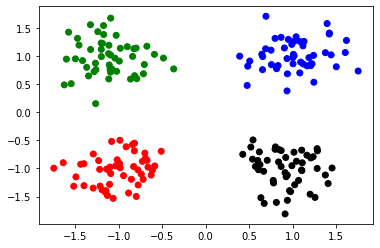

In [31]:
yhat.replace(to_replace=[0,1,2,3], value=['blue', 'red', 'black', 'green'], inplace=True)
plt.scatter(gtest['x'], gtest['y'], c=yhat)

In [12]:

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = gtest['x'].values.min() - 1, gtest['x'].values.max() + 1
y_min, y_max = gtest['y'].values.min() - 1, gtest['y'].values.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()].reshape(-1,1))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


IndexError: tuple index out of range

KNN

In [17]:
g1 = (2,2) + 0.3 * np.random.randn(20, 2)
g2 = [2,4] + 0.3 * np.random.randn(20, 2)
g3 = [4,2] + 0.3 * np.random.randn(20, 2)
g4 = [4,4] + 0.3 * np.random.randn(20, 2)
gt = np.concatenate([g1,g2,g3,g4])

color1 = ['black']*20
color2 = ['blue']*20
color3 = ['green']*20
color4 = ['red']*20
colort = np.array([color1, color2, color3, color4]).flatten()

In [253]:
from sklearn.metrics import accuracy_score
def euclidian(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
def get_knn(train, test, k):
    final_result=[]
    for i in test.values:
        result = []
        for j in train.values:
            result.append([euclidian(i[:2].tolist(), j[:2].tolist()), j[2]])
        result = pd.DataFrame(result, columns=['dist','color'])
        result = result.sort_values(by='dist', ascending=True)
        result = np.array(result)
        x = list (map(result[0:k, 1].tolist().count, ("black", "red", "green", "blue")))
        final_result.append(["black", "red", "green", "blue"][np.argmax(x)])
    
    return final_result, accuracy_score(final_result, test['color'])

In [254]:
g = pd.DataFrame(g)
g = pd.concat([g[0], g[1], pd.Series(color)], axis=1)
g.columns = ['x','y','color']
gt = pd.DataFrame(gt)
gt = pd.concat([gt[0], gt[1], pd.Series(colort)], axis=1)
gt.columns = ['x','y','color']

In [255]:
res, acc = get_knn(g,gt,10)

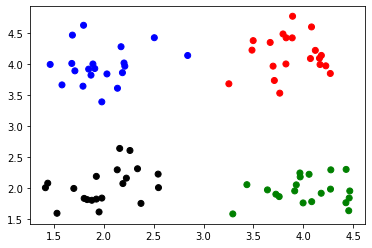

In [256]:
plt.scatter(gt.values[:,0], gt.values[:,1], c=res)

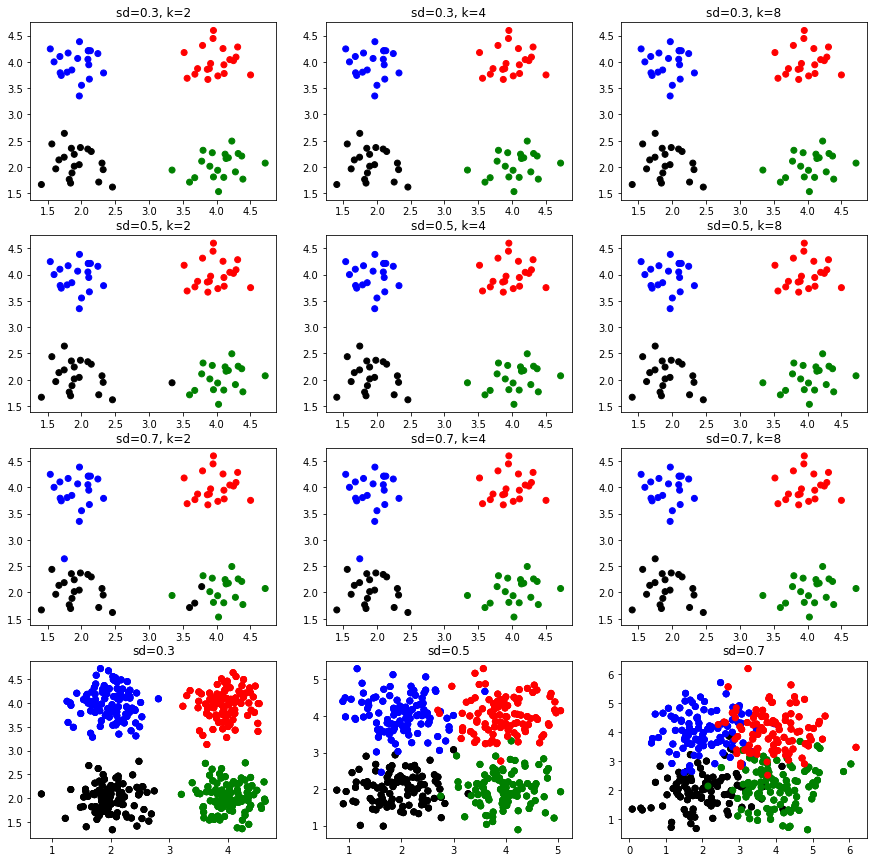

In [370]:
results=[]
figure, axis = plt.subplots(4, 3, figsize=(15,15))

color1 = ['black']*100
color2 = ['blue']*100
color3 = ['green']*100
color4 = ['red']*100
color = np.array([color1, color2, color3, color4]).flatten()

color1 = ['black']*20
color2 = ['blue']*20
color3 = ['green']*20
color4 = ['red']*20
colort = np.array([color1, color2, color3, color4]).flatten()

g1 = (2,2) + 0.3 * np.random.randn(20, 2)
g2 = [2,4] + 0.3 * np.random.randn(20, 2)
g3 = [4,2] + 0.3 * np.random.randn(20, 2)
g4 = [4,4] + 0.3 * np.random.randn(20, 2)
gt = np.concatenate([g1,g2,g3,g4])
gt = pd.DataFrame(gt)
gt = pd.concat([gt[0], gt[1], pd.Series(colort)], axis=1)
gt.columns = ['x','y','color']

for l,i in enumerate([0.3,0.5,0.7]):
    g1 = (2,2) + i * np.random.randn(100, 2)
    g2 = [2,4] + i * np.random.randn(100, 2)
    g3 = [4,2] + i * np.random.randn(100, 2)
    g4 = [4,4] + i * np.random.randn(100, 2)
    g = np.concatenate([g1,g2,g3,g4])
 
    g = pd.DataFrame(g)
    g = pd.concat([g[0], g[1], pd.Series(color)], axis=1)
    g.columns = ['x','y','color']

    if (l==0):
        for a,b in enumerate([2,4,8]):
            results.append(get_knn(g,gt,b))
            axis[0,a].scatter(gt.values[:,0], gt.values[:,1], c=results[a][0])
            axis[0,a].set_title('sd=0.3, k='+str(b))
            axis[3,0].scatter(g.values[:,0], g.values[:,1], c=g['color'].values)
            axis[3,0].set_title('sd=0.3')
    if (l==1):
        for a,b in enumerate([2,4,8]):
            results.append(get_knn(g,gt,b))
            axis[1,a].scatter(gt.values[:,0], gt.values[:,1], c=results[a+3][0])
            axis[1,a].set_title('sd=0.5, k='+str(b))
            axis[3,1].scatter(g.values[:,0], g.values[:,1], c=g['color'].values)
            axis[3,1].set_title('sd=0.5')
    if (l==2):
        for a,b in enumerate([2,4,8]):
            results.append(get_knn(g,gt,b))
            axis[2,a].scatter(gt.values[:,0], gt.values[:,1], c=results[a+6][0])
            axis[2,a].set_title('sd=0.7, k='+str(b))
            axis[3,2].scatter(g.values[:,0], g.values[:,1], c=g['color'].values)
            axis[3,2].set_title('sd=0.7')

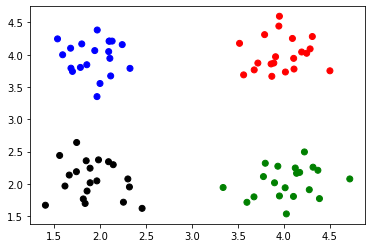

In [371]:
plt.scatter(gt.values[:,0], gt.values[:,1], c=gt['color'].values)

In [392]:
k=2
for i,j in enumerate(results):
    if (i<3):
        print ('Acurácia para sd=0.3 e k='+str(k)+ ': '+ str(j[1]))
        k=k*2
    if (i==3):
        k=2
        print ('Acurácia para sd=0.5 e k='+str(k)+ ': '+ str(j[1]))
    if (i>3 and i<6):
        k=k*2
        print ('Acurácia para sd=0.5 e k='+str(k)+ ': '+ str(j[1]))
    if (i==6):
        k=2
        print ('Acurácia para sd=0.7 e k='+str(k)+ ': '+ str(j[1]))
    if (i>6):
        print ('Acurácia para sd=0.7 e k='+str(k)+ ': '+ str(j[1]))
        k=k*2

Acurácia para sd=0.3 e k=2: 1.0
Acurácia para sd=0.3 e k=4: 1.0
Acurácia para sd=0.3 e k=8: 1.0
Acurácia para sd=0.5 e k=2: 0.9875
Acurácia para sd=0.5 e k=4: 1.0
Acurácia para sd=0.5 e k=8: 1.0
Acurácia para sd=0.7 e k=2: 0.95
Acurácia para sd=0.7 e k=2: 0.9875
Acurácia para sd=0.7 e k=4: 1.0


In [386]:
for i in results:
    print (i[1])

1.0
1.0
1.0
0.9875
1.0
1.0
0.95
0.9875
1.0


In [1]:
import numpy as np

In [3]:
np.load('hidden_dim.npy', allow_pickle=True)

EOFError: Ran out of input